# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project where we are given data set but we don't know much about the features

__*Important: I did this project when I was taking a course on Udemy (Ref: Portilla, J. (n.d.). Learn python for data science, structures, algorithms, interviews. Retrieved March 02, 2021, from https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/).__

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data
**Let's read the 'KNN_Project_Data csv file into a dataframe**

In [4]:
df= pd.read_csv('KNN_Project_Data')

In [5]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


**Let's check the dataframe.**

In [6]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Let's use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

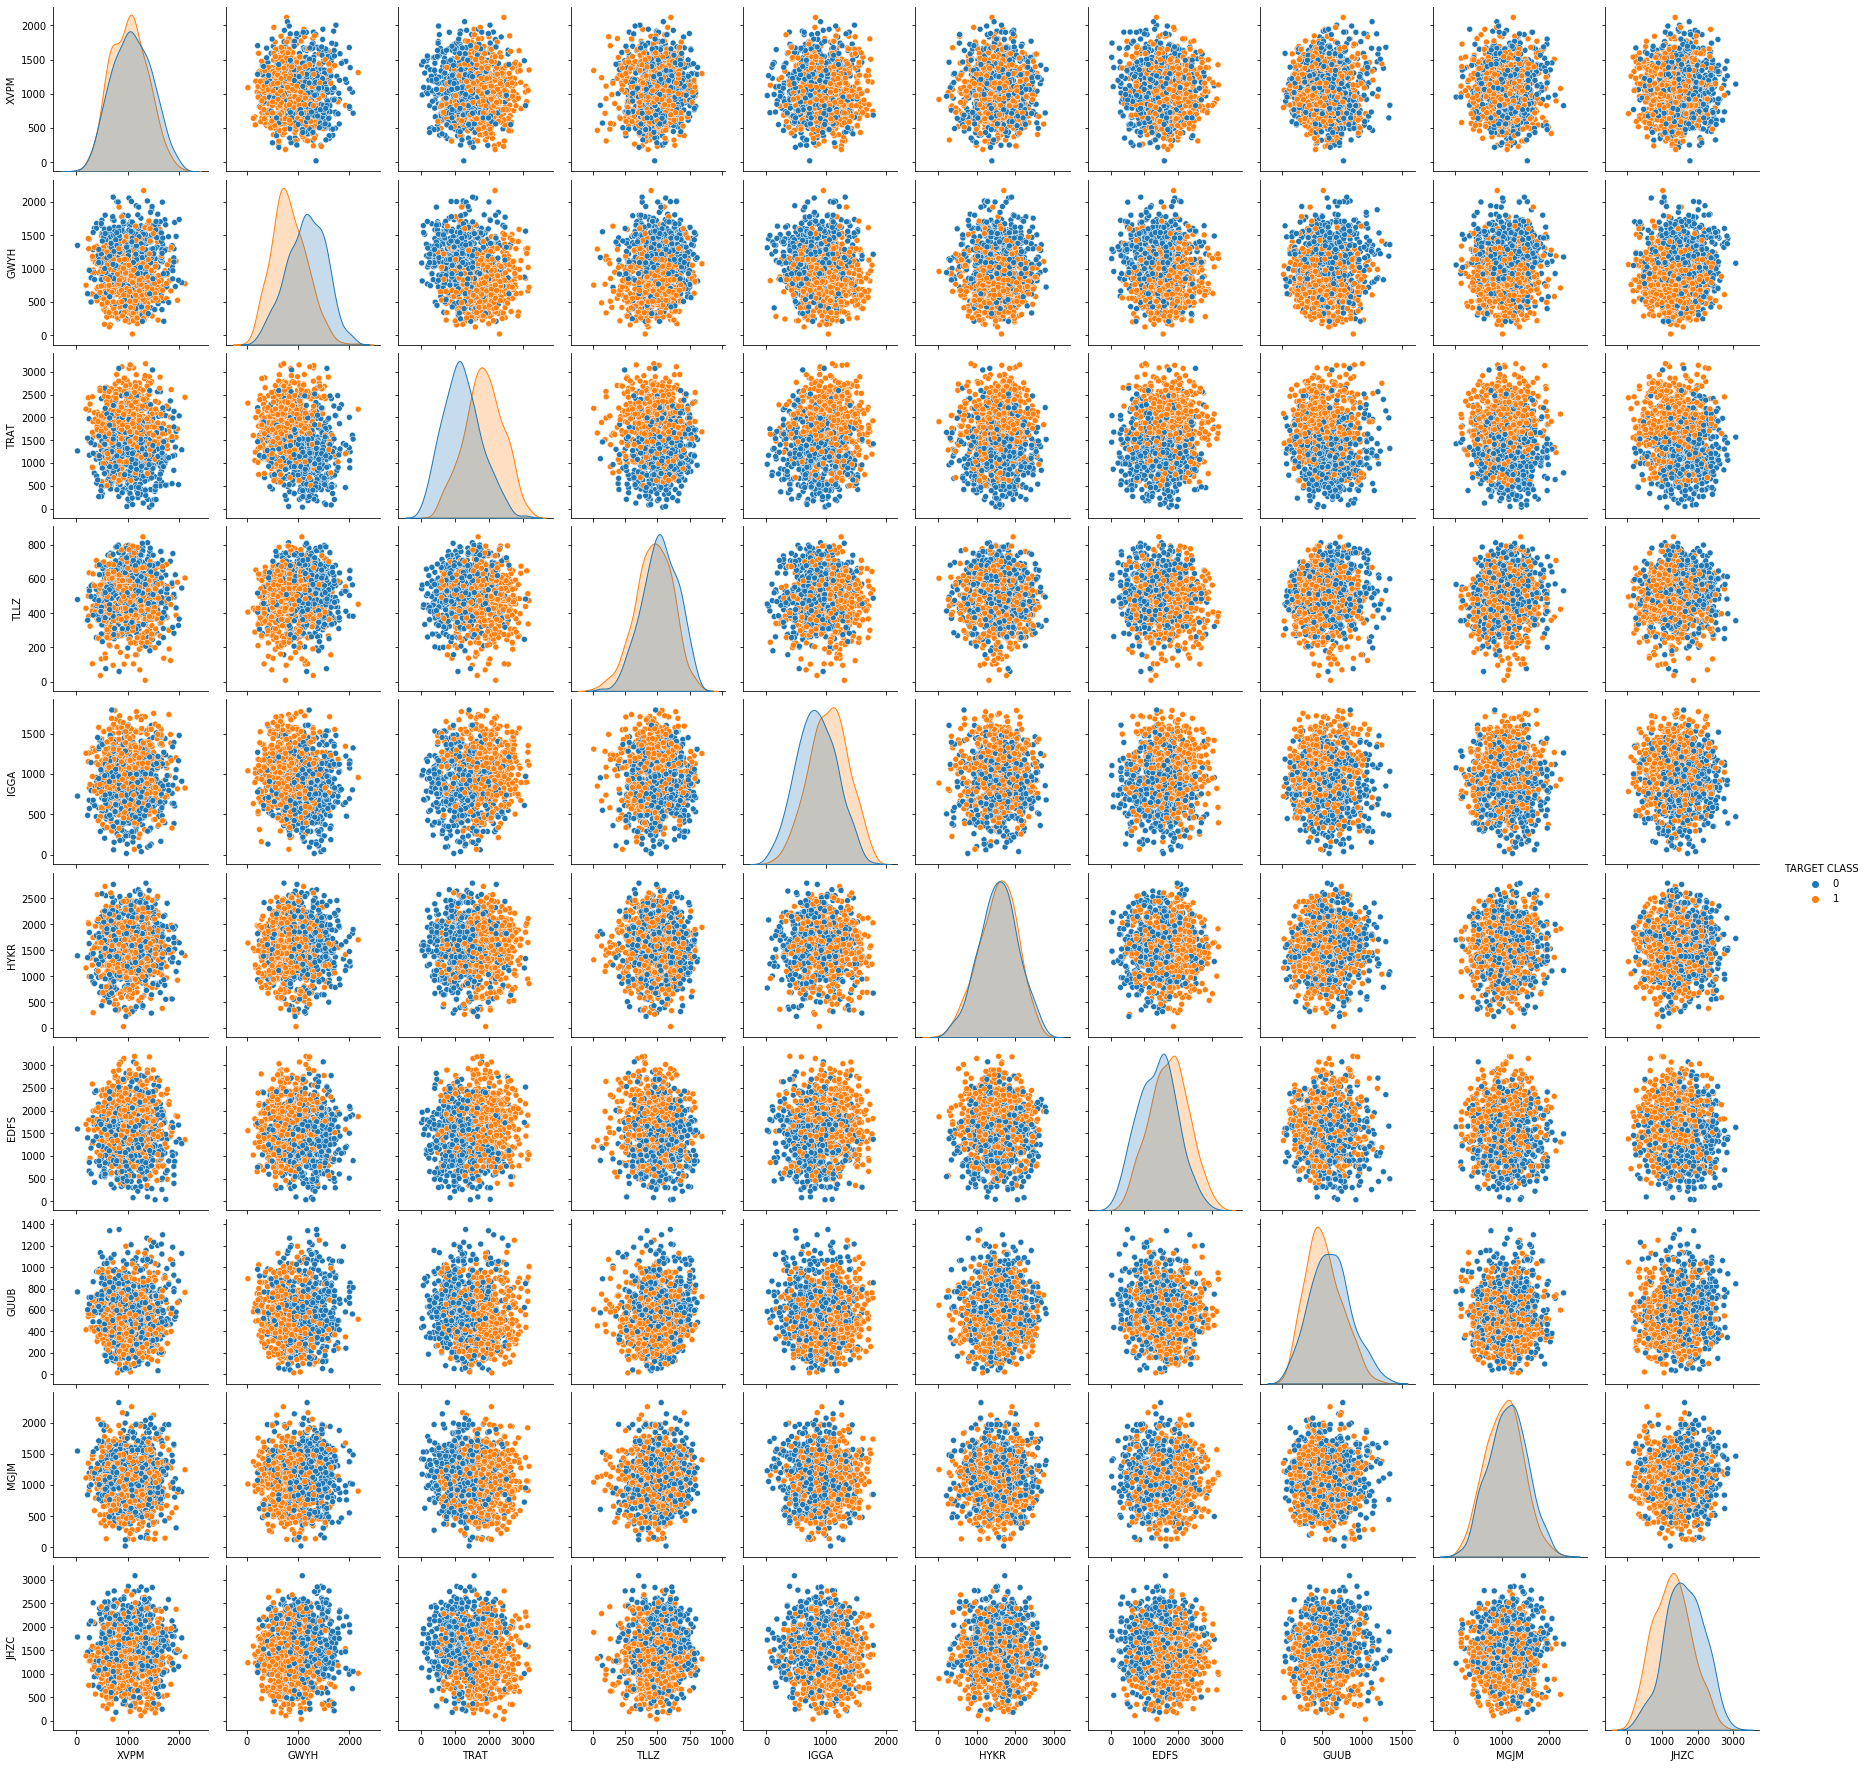

In [8]:
sns.pairplot(df, hue= 'TARGET CLASS')

# Standardize the Variables

Time to standardize the variables.

**Let's import StandardScaler from Scikit learn.**

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler= StandardScaler()

**Let's fit scaler to the features.**

In [13]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Let's use the .transform() method to transform the features to a scaled version.**

In [15]:
scalar_features= scaler.transform(df.drop('TARGET CLASS', axis=1))

**Let's convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [20]:
df_feat= pd.DataFrame(scalar_features, columns= df.columns[:-1])

In [21]:
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Let's use train_test_split to split your data into a training set and a testing set.**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X= df_feat
y= df['TARGET CLASS']

In [27]:
#we can set test_size=0.3 and random_state=101, random_state can also be left blank but just so that I can refer back to these results in the future, I am setting it to 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Using KNN

**Let's import KNeighborsClassifier from scikit learn.**

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn= KNeighborsClassifier(n_neighbors=1)

**Let's fit this KNN model to the training data.**

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Let's use the predict method to predict values using your KNN model and X_test.**

In [31]:
pred= knn.predict(X_test)

**Now let's create a confusion matrix and classification report.**

In [32]:
from sklearn import metrics

In [33]:
metrics.confusion_matrix(y_test,pred)

array([[109,  43],
       [ 41, 107]], dtype=int64)

In [36]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

**Let's create a for loop that trains various KNN models with different k values, then we can keep track of the error_rate for each of these models with a list.**

In [44]:
error_rate= []

for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i= knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Now let's plot the information from the for loop.**

Text(0.5, 1.0, 'Error rate vs K value')

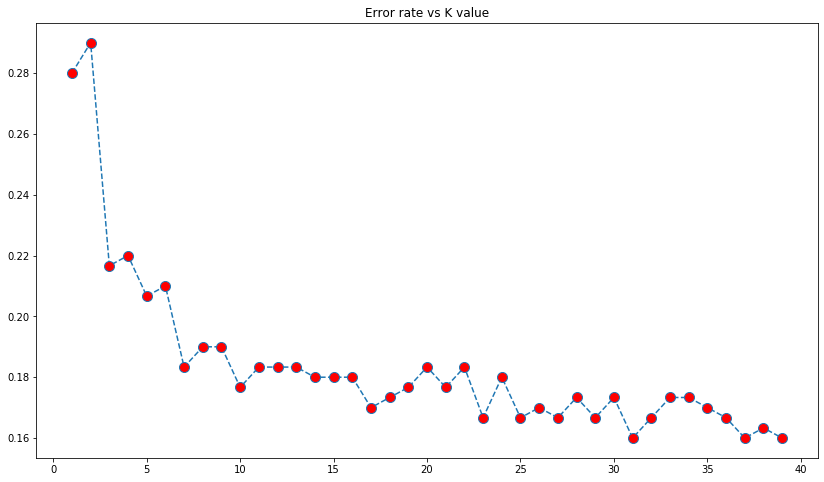

In [59]:
plt.figure(figsize=[14,8])
plt.plot(range(1,40), error_rate, marker='o', linestyle= 'dashed', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K value')

## Retrain with new K Value

**We can retrain the model with the best K value, in  this case I feel 30 would be a good k value because of low error_rate**

In [64]:
knn= KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
pred= knn.predict(X_test)

In [65]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



# Done!